# Network Optimization - Assignment #1

## Data

* A set $V =\{1, \ldots, n\}$ of jobs
* A set $T =\{1, \ldots, m\}$ of tools
* A $r_j$ denote the revenue of job $j$
* A cost $r_t$ associated with a tool $t$



In [1]:
import gurobipy as gb
import networkx as nx
from networkx.algorithms import bipartite
import random

from IPython.display import SVG

Set-up and solve a simple job-tools problem:

$$
\begin{eqnarray}
max \sum_{j=1}^n r_j - \sum_{t=1}^m c_t\\
&& \sum_{j=1}^n r_j x_j  \le C\\ 
&& 
&& r_t \ge 0
&& r,c \in \{0,1\}^n
\end{eqnarray}
$$

In [2]:
random.seed(10)

# we have n jobs and m tools
n = 15
m = 10

# revenue of job
revenue = {i:random.randint(10,70)  for i in range(n)}

# cost associated with a tool
cost = {i:random.randint(10,50)  for i in range(m)}

# overall budget
C = sum(cost.values()) // 3

#print(revenue)
#print()
#print(cost)
#print()
#print(B)

In [3]:
G = nx.Graph()

G.add_nodes_from(revenue,bipartite=0)
G.add_nodes_from(cost,bipartite=1)

# create completed bipartite graph between jobs and tools
G = nx.complete_bipartite_graph(n, m)

#remove some of the edges between jobs and tools

set1 = {i:random.randint(10,70)  for i in range(n//2)}
set2 = {i:random.randint(10,50)  for i in range(m//2)}
#ebunch=[(1,2),(2,1), (1,3), (3,1), (1,4), (4,1), (0, 15), (15, 0)]
ebunch = [list(zip(set1,set2))]

# delete some of the edges for testing purposes
G.remove_edges_from(ebunch)

#print(G.edges())

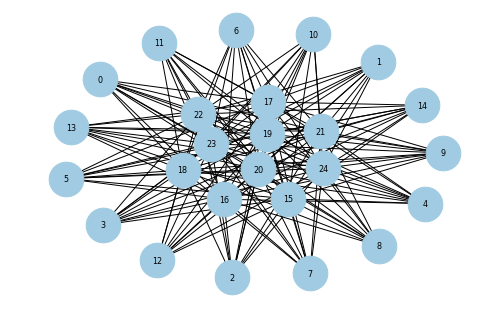

In [4]:
%matplotlib inline
pos = nx.spring_layout(G)
nx.draw(G,pos,node_color='#A0CBE2',width=1,node_size=1200,with_labels=True,hold=None, font_size=8)

In [6]:
# Create the model

jobToolsProblem = gb.Model('jobToolsProblem')

x = jobToolsProblem.addVars(n, vtype=gb.GRB.BINARY, name='x')

y = jobToolsProblem.addVars(m, vtype=gb.GRB.BINARY, name='y')

#x
#y

In [9]:
# Objective function

jobToolsProblem.setObjective(x.prod(revenue) - y.prod(cost), gb.GRB.MAXIMIZE)
jobToolsProblem.write('jobToolsProb.lp')

In [11]:
# Constraint

jobToolsProblem.addConstr(x.prod(revenue) <= C, name='ToolConstraint')

jobToolsProblem.update()

In [12]:
jobToolsProblem.write('jobToolsProb.lp')

In [13]:
jobToolsProblem.optimize()

Optimize a model with 1 rows, 25 columns and 15 nonzeros
Variable types: 0 continuous, 25 integer (25 binary)
Coefficient statistics:
  Matrix range     [1e+01, 6e+01]
  Objective range  [1e+01, 6e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [9e+01, 9e+01]
Found heuristic solution: objective 88.0000000
Presolve removed 0 rows and 12 columns
Presolve time: 0.00s
Presolved: 1 rows, 13 columns, 13 nonzeros
Found heuristic solution: objective 88.0000000
Variable types: 0 continuous, 13 integer (13 binary)

Root relaxation: cutoff, 0 iterations, 0.00 seconds

Explored 0 nodes (0 simplex iterations) in 0.03 seconds
Thread count was 4 (of 4 available processors)

Solution count 3: 88 88 42 

Optimal solution found (tolerance 1.00e-04)
Best objective 8.800000000000e+01, best bound 8.800000000000e+01, gap 0.0000%


In [14]:
print('Obj: %g' % jobToolsProblem.objVal)

print ()

for v in jobToolsProblem.getVars():
    if v.x > 0:
        print ('%s=%g' % (v.varName, v.x), end = ' ')
    

Obj: 88

x[1]=1 x[4]=1 x[5]=1 x[14]=1 